### Thêm các thư viện

In [336]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np 

# Algorithms
from sklearn import tree
from sklearn import ensemble
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

### Lấy tập dữ liệu đưa vào dataframe

In [337]:
df = pd.read_csv("./SMSSpamCollection", sep='\t', header=None, names=['Label', 'SMS'])

In [338]:
df.head(10)

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [339]:
print(f'Tập dữ liệu có chứa {df.shape[0]} thư.')

Tập dữ liệu có chứa 5572 thư.


In [340]:
df['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

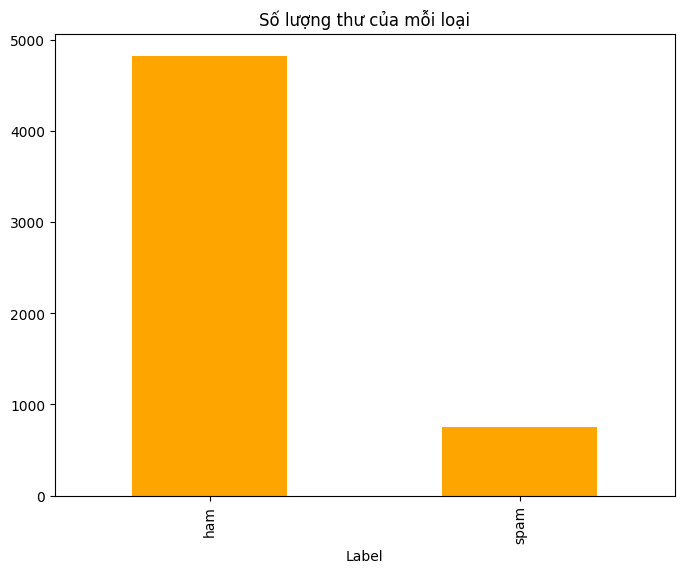

In [341]:
plt.figure(figsize=(8,6))

df['Label'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Số lượng thư của mỗi loại')
plt.show()

### WordCloud - Đám mây từ

WordCloud là một biểu đồ thể hiện cho tần suất xuất hiện của các từ trong đoạn văn bản, những từ xuất hiện nhiều lần sẽ được hiển thị với kích thước lớn và ngược lại


Text(0.5, 1.0, 'Ham Word Cloud')

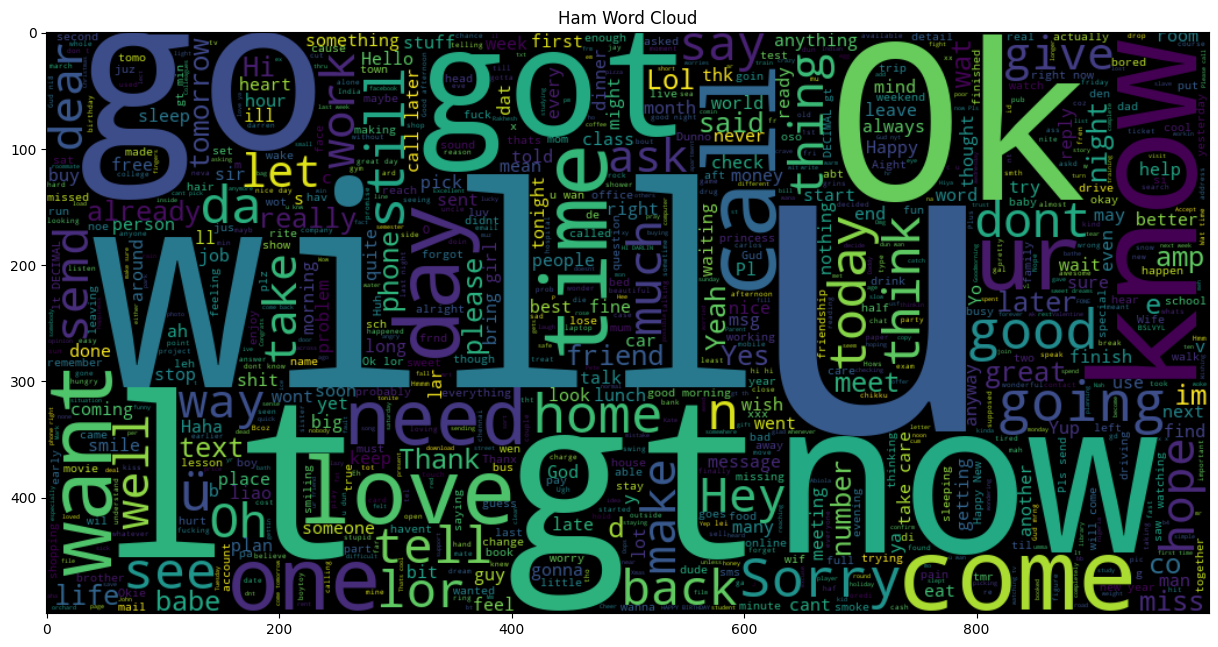

In [342]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Label =="ham" ].SMS))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

Text(0.5, 1.0, 'Spam Word Cloud')

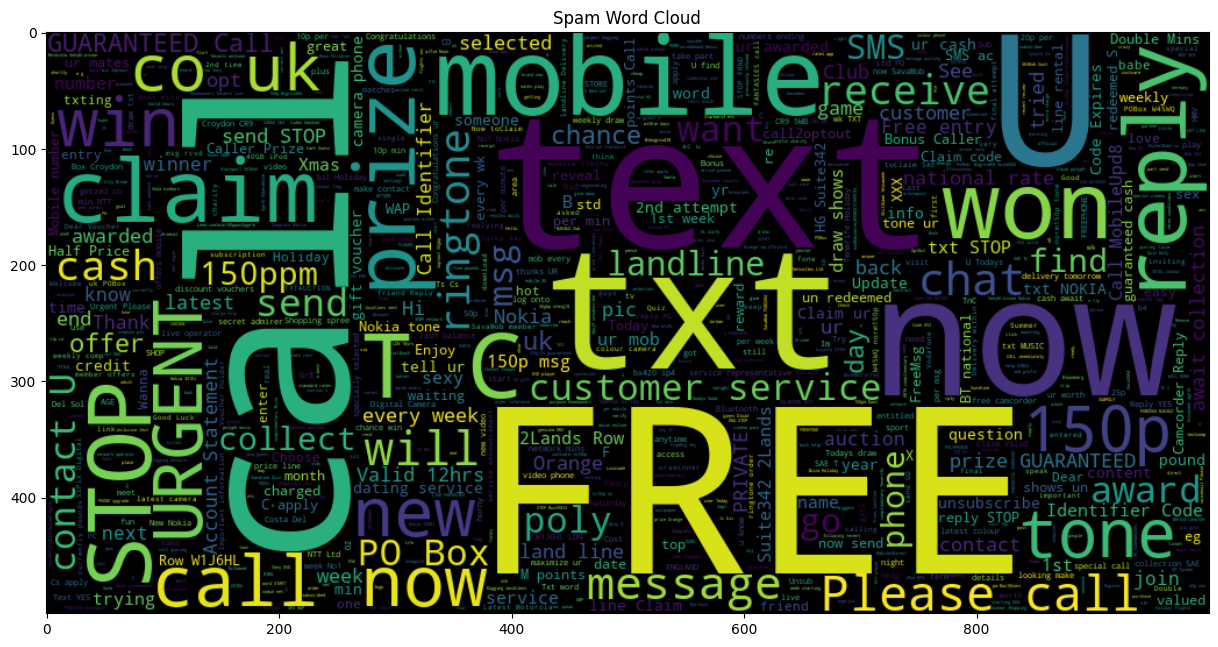

In [343]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Label =="spam" ].SMS))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

In [344]:
df['Label']=df['Label'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [345]:
X=df['SMS']
Y=df['Label']

### Xây dựng mô hình Naive Bayes và so sánh độ hiệu quả của mô hình Naive Bayes với các loại mô hình phân loại khác

Trong phần này, nhóm em sẽ tiến hành xây dựng mô hình Naive Bayes với các mô hình sau

*  Với mô hình Naive Bayes, chúng em sẽ tiến hành đánh giá chi tiết việc chọn các tham số của mô hinh Naive Bayes cũng như so sánh hai phương thức tiền xử lí dữ liệu là CountVectorizer - ma trận đếm và TfIdfVectorizer - ma trận TfIdf

Sau khi tiến hành xây dựng mô hình Naive Bayes, chúng em sẽ tiến hành so sánh độ hiệu quả với các mô hình sau. Do không có nhiều thời gian nghiên cứu kĩ hơn và do đây cũng chỉ là phần làm bổ sung thêm nên nhóm sẽ không đi sâu vào việc đi tim các bộ siêu tham số tối ứu mà chỉ sử dụng các bộ tham số mặc định thường được dùng. Mục đích của nhóm trong phần này là tìm hiểu thêm cách thức mà các mô hình đó sẽ hoạt động như thế nào với bài toán phân loại
- Support Vector Machine
- KNN
- Decision Tree
- Random Forest



### I.Naive Bayes

#### Lựa chọn siêu tham số cho mô hình Naive Bayes với CountVectorizer

Dùng CountVectorizer để chuyển tập dữ liệu thành các ma trận đếm

In [346]:
f = feature_extraction.text.CountVectorizer(stop_words='english')
X_CV = f.fit_transform(X)
np.shape(X_CV)


(5572, 8444)

Dùng train_test_split của sklearn để chia tập dữ liệu thành các tập huấn luyện và kiểm thử

In [347]:
X_CV_train, X_CV_test, y_CV_train, y_CV_test = model_selection.train_test_split(X_CV, Y, test_size=0.33, random_state=42)
print([np.shape(X_CV_train), np.shape(X_CV_test)])

[(3733, 8444), (1839, 8444)]


Tiến hành tạo một mảng cái giá trị alpha trong khoảng 0.01 đến 100 với bước nhảy 0.1. Sau đó ta sẽ tạo ra các mảng score_train - độ chính xác trên tập huấn luyện, score_test - độ chính xác trên tập kiểm thử , recall và precision sẽ nói rõ ở phần sau

In [348]:
list_alpha = np.arange(1/10000, 100, 0.1)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha: 
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_CV_train,y_CV_train)
    score_train[count] = bayes.score(X_CV_train, y_CV_train)
    score_test[count]= bayes.score(X_CV_test, y_CV_test)
    recall_test[count] = metrics.recall_score(y_CV_test, bayes.predict(X_CV_test))
    precision_test[count] = metrics.precision_score(y_CV_test, bayes.predict(X_CV_test))
    count = count + 1


Ma trận biểu diễn các độ đo của mô hình với các giá tị alpha tương ứng

In [349]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.0001,0.997589,0.977705,0.947154,0.892720
1,0.1001,0.997053,0.976074,0.963415,0.871324
2,0.2001,0.996518,0.975530,0.963415,0.868132
3,0.3001,0.996518,0.977705,0.967480,0.878229
4,0.4001,0.996518,0.977705,0.967480,0.878229
5,0.5001,0.995982,0.978249,0.967480,0.881481
6,0.6001,0.995178,0.977705,0.963415,0.881041
7,0.7001,0.995178,0.978249,0.963415,0.884328
8,0.8001,0.994910,0.977162,0.955285,0.883459
9,0.9001,0.994642,0.978249,0.955285,0.890152


Nói rõ hơn một chút về hai giá trị Precision và Recall. Cùng nhìn vào công thức sau: 
![img1](./img/precision.png)
![img2](./img/recall.png)

Positive đại diện cho thư rác, Negative là thư bình thường, như vậy TP - True Positive là lượng thư rác được phân là thư rác, False Positive là lượng thư thường thành thư rác. Tương tự với các giá trị Negative 

Như vậy từ công thức trên ta có thể đưa ra nhận xét, giá trị Precision càng thấp  - FP cao tức là có nhiều thư bình thường lại bị phân thành thư rác; giá trị Recall càng thấp - FN cao tức là có nhiều thư rác thành thư bình thường.

Với bài toán phân loại thư rác này, có vẻ việc phân loại sao cho những thư bình thường không bị phần thành spam sẽ quan trọng hơn việc phân loại sao cho thư spam không bị phân thành thư thường quá nhiều. Nên ta sẽ lựa chọn giá trị alpha cho ra giá trị Precision tốt nhất, nếu có nhiều giá trị alpha đưa về kết quả Precision như nhau, ta sẽ tính đến giá trị Recall


In [350]:
CV_best_index = models['Test Precision'].idxmax()
models.iloc[CV_best_index, :]

alpha             15.200100
Train Accuracy     0.975355
Test Accuracy      0.978793
Test Recall        0.841463
Test Precision     1.000000
Name: 152, dtype: float64

In [351]:
models[models['Test Precision'] == 1].sort_values('Test Recall', ascending=False)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
152,15.2001,0.975355,0.978793,0.841463,1.0
154,15.4001,0.975087,0.978793,0.841463,1.0
153,15.3001,0.975355,0.978793,0.841463,1.0
155,15.5001,0.974819,0.977705,0.833333,1.0
157,15.7001,0.974819,0.977705,0.833333,1.0
...,...,...,...,...,...
995,99.5001,0.915082,0.909734,0.325203,1.0
996,99.6001,0.915082,0.909734,0.325203,1.0
997,99.7001,0.915082,0.909734,0.325203,1.0
998,99.8001,0.915082,0.909734,0.325203,1.0


Như vậy ta thấy có nhiều giá trị alpha cho về Test Precision rất cao (1.0 - tuyệt đối, tức là không có thư thường bị phân thành thư rác). Vậy ta sẽ tiến hành tìm giá trị alpha cho ra giá trị Test Recall lớn hơn.
Tuy nhiên có 3 giá trị alpha trả về các giá trị Test Recall, Test Precision tối ưu, có thể xét đến Test Accuracy nhưng ba giá trị này lại như nhau nên ta xét đến Train Accuracy. Có 2 giá trị alpha cho về Train Accuracy tối ưu nên nhóm sẽ chọn 15.2001


In [352]:
CV_best_index = 152

Như vậy ta đã tìm được giá trị tối ưu của alpha là 15.21. Tiếp theo hay cùng xem xét ma trận confusion để hiểu rõ hơn lí do có được các độ đo trên

In [353]:
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[CV_best_index])
bayes.fit(X_CV_train, y_CV_train)

MultinomialNB(alpha=15.2001)

In [354]:
m_confusion_test = metrics.confusion_matrix(y_CV_test, bayes.predict(X_CV_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Ham', 'Spam'])

,Predicted Ham,Predicted Spam
Ham,1593,0
Spam,39,207


Không có thư thường nào bị phân thành thư rác, vậy nên giá trị Precision mới là 1. Có một lượng tương đối thư rác được phần thành thư thường, nguyên nhân có thể là do những thư này không có tính đặc trưng cao nên dễ bị phân loại nhầm

In [355]:
# Phần này để lưu dữ liệu trên vào các số để biểu diễn trực quan hơn ở phần so sánh với các mô hình phía dưới
# Vì sau đoạn này là lựa chọn tham số cho Naive Bayes với TfIdf nhung vẫn dùng các biến cũng như ma trận để ghi đè nên sẽ mất dữ liệu cũ 
# Hãy nhớ chạy đoạn code này trước phần II 
score_1 = score_train[CV_best_index]
score_2 = score_test[CV_best_index]
score_3 = recall_test[CV_best_index]
score_4 = precision_test[CV_best_index]

#### Lựa chọn tham số cho mô hình Naive Bayes với TfidfVectorizer

Tiếp theo, nhóm sẽ xem xét lựa chọn tham số với mô hình Naive Bayes khi mà dùng TfidfVectorizer để trích xuất đặc trưng. Cách làm cơ bản cũng tương tự như với CountVectorizer

In [356]:
f2 = feature_extraction.text.TfidfVectorizer(stop_words='english')
X_TI = f2.fit_transform(X)
np.shape(X_TI)

(5572, 8444)

In [357]:
X_TI_train, X_TI_test, y_TI_train, y_TI_test = model_selection.train_test_split(X_TI, Y, test_size=0.33, random_state=42)
print([np.shape(X_TI_train), np.shape(X_TI_test)])

[(3733, 8444), (1839, 8444)]


In [358]:
list_alpha = np.arange(1/10000, 100, 0.1)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha: 
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_TI_train,y_TI_train)
    score_train[count] = bayes.score(X_TI_train, y_TI_train)
    score_test[count]= bayes.score(X_TI_test, y_TI_test)
    recall_test[count] = metrics.recall_score(y_TI_test, bayes.predict(X_TI_test))
    precision_test[count] = metrics.precision_score(y_TI_test, bayes.predict(X_TI_test))
    count = count + 1

c:\Users\NguyenDuyet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NguyenDuyet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NguyenDuyet\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\N

In [359]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns =
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.0001,0.999196,0.980424,0.947154,0.910156
1,0.1001,0.998125,0.983143,0.951220,0.924901
2,0.2001,0.997053,0.983687,0.943089,0.935484
3,0.3001,0.995446,0.985862,0.934959,0.958333
4,0.4001,0.993839,0.986949,0.918699,0.982609
5,0.5001,0.991428,0.983687,0.886179,0.990909
6,0.6001,0.988481,0.982599,0.873984,0.995370
7,0.7001,0.985267,0.979880,0.853659,0.995261
8,0.8001,0.981516,0.975530,0.821138,0.995074
9,0.9001,0.978302,0.972268,0.796748,0.994924


In [360]:
TI_best_index = models['Test Precision'].idxmax()
models.iloc[TI_best_index, :]

alpha             1.000100
Train Accuracy    0.974819
Test Accuracy     0.969549
Test Recall       0.772358
Test Precision    1.000000
Name: 10, dtype: float64

In [361]:
models[models['Test Precision'] == 1].sort_values('Test Recall', ascending=False)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
10,1.0001,0.974819,0.969549,0.772358,1.0
11,1.1001,0.971872,0.965198,0.739837,1.0
12,1.2001,0.969462,0.964111,0.731707,1.0
13,1.3001,0.966247,0.959761,0.699187,1.0
14,1.4001,0.963836,0.957586,0.682927,1.0
...,...,...,...,...,...
77,7.7001,0.866595,0.866775,0.004065,1.0
78,7.8001,0.866595,0.866775,0.004065,1.0
79,7.9001,0.866327,0.866775,0.004065,1.0
80,8.0001,0.865792,0.866775,0.004065,1.0


Như vậy giá trị tối ưu của khi tiền xử lí bằng TfIdfVectorizer là alpha = 1.01, kết quả Test Precision vẫn là 1 nhưng có vẻ Test Recall không được tối ưu như của CountVectorizer, tuy nhiên, không thể nói rằng CountVectorizer tốt hơn TfidfVectorizer vì điều đó còn phụ thuộc nhiều vào tập dữ liệu cũng như cách phân chia tập dữ liệu thành tập huấn luyện và kiểm thử.Nhóm đã thử chạy lại code nhiều lần nhưng kết quả vẫn cho ra CountVectorizer tốt hơn nên đối với tập dữ liệu này, có vẻ CountVectorizer sẽ cho ra kết quả phù hợp với mong muốn của đề tài hơn nên nhóm sẽ chọn CountVectorizer, và cũng sẽ xử dụng CountVectorizer cho việc so sánh Naive Bayes với cái mô hình khác.

### II. So sánh Naive Bayes với các mô hình khác

#### SVM - Support Vector Machine

In [362]:
svm_model = svm.SVC(kernel="rbf",C=1000,gamma=0.001)
svm_model.fit(X_CV_train, y_CV_train)

SVC(C=1000, gamma=0.001)

#### K-NN - K nearest neighbor

In [363]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_CV_train,y_CV_train)

KNeighborsClassifier(n_neighbors=3)

### Decision Tree

In [364]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_CV_train,y_CV_train)


DecisionTreeClassifier()

#### Random Forest

In [365]:
forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X_CV_train,y_CV_train)

RandomForestClassifier()

#### So sánh độ hiệu quả

In [368]:
svm_prediction = svm_model.predict(X_CV_test)
knn_prediction = knn_model.predict(X_CV_test)
tree_prediction = tree_model.predict(X_CV_test)
forest_prediction = forest_model.predict(X_CV_test)


In [369]:
model_compare = {
    'Model': ['Naive Bayes', 'SVM', 'k-NN', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': [score_1, svm_model.score(X_CV_train,y_CV_train), knn_model.score(X_CV_train,y_CV_train), tree_model.score(X_CV_train,y_CV_train), forest_model.score(X_CV_train,y_CV_train)],
    'Test Accuracy': [score_2, svm_model.score(X_CV_test, y_CV_test), knn_model.score(X_CV_test, y_CV_test), tree_model.score(X_CV_test, y_CV_test), forest_model.score(X_CV_test, y_CV_test)],
    'Precision': [score_3, metrics.precision_score(y_CV_test, svm_prediction), metrics.precision_score(y_CV_test, knn_prediction), metrics.precision_score(y_CV_test, tree_prediction), metrics.precision_score(y_CV_test, forest_prediction)],
    'Recall': [score_4, metrics.recall_score(y_CV_test, svm_prediction), metrics.recall_score(y_CV_test, knn_prediction), metrics.recall_score(y_CV_test, tree_prediction), metrics.recall_score(y_CV_test, forest_prediction)]
}

df = pd.DataFrame(model_compare)
print(df)

           Model  Train Accuracy  Test Accuracy  Precision    Recall
0    Naive Bayes        0.975355       0.978793   0.841463  1.000000
1            SVM        1.000000       0.988581   0.995595  0.918699
2           k-NN        0.946156       0.925503   1.000000  0.443089
3  Decision Tree        1.000000       0.971180   0.932735  0.845528
4  Random Forest        1.000000       0.977162   1.000000  0.829268


### III. Tiến hành xây bộ lọc với thư nhập từ bàn phím để kiểm tra với các thư không có trong tập dữ liệu

In [384]:
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[CV_best_index])
bayes.fit(X_CV_train, y_CV_train)
text = input("Hãy nhập thư: ")

You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327

In [385]:
text = f.transform([text])

In [386]:

predicted_label = bayes.predict(text)

In [387]:

if predicted_label == 1:
    print("Dự đoán: Thư rác")
else:
    print("Dự đoán: Thư thường")

Dự đoán: Thư rác
